
# Display Region Segmentation and OCR Application

## Table of Contents
1. [Connect to Drive and Check GPU](#1.-Connect-to-Drive-and-Check-GPU)
2. [Data Preparation and Analysis](#2.-Data-Preparation-and-Analysis)
    1. [Import Data from Roboflow](#a.-Import-Data-from-Roboflow)
    2. [Display Directory Tree](#b.-Display-Directory-Tree)
    3. [Display Samples](#c.-Display-Samples)
3. [Segmentation Model Selection and Training](#3.-Segmentation-Model-Selection-and-Training)




## 1. Connect to Drive and Check GPU

In [ ]:
!nvidia-smi # check GPU

Mon Jun 24 15:09:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive

# Mount your Google Drive to the notebook
drive.mount('/content/drive')

# Set the directory path you want to save your files to
save_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation'

# Change the current working directory to the save path
%cd $save_path

Mounted at /content/drive
/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation


## 2. Data Preparation and Analysis:





## a. Import Data from Roboflow

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="N2xaQcRW9Cal7dTHEBjP")
project = rf.workspace("tunis-business-school-h78ot").project("yolov8_segmentation")
dataset = project.version(1).download("yolov8")


## b. Display Directory Tree

In [ ]:
import os

def display_directory_tree(directory, indent=''):
    print(indent + os.path.basename(directory) + '/')
    indent += '    '
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            display_directory_tree(item_path, indent)

data_dir = "/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data"
display_directory_tree(data_dir)

yolov8_segmentation_data/
    test/
        labels/
        images/
    valid/
        labels/
        images/
    train/
        labels/
        images/


## 3. Segmentation Model Selection and training

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

In [ ]:
import os
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0,>=1.23.5
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [ ]:
from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation
!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/data.yaml epochs=60 imgsz=640

/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

## 4. Model Testing and Evaluation

### a. Prediction Using the Trained Model

In [ ]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train3/weights/best.pt conf=0.4 source=/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/test/images save=True save_txt=True

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/20 /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/test/images/id_1007_value_60_219_png.rf.8b41194f7357eb95e099cf5967447180.jpg: 640x640 (no detections), 76.3ms
image 2/20 /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/test/images/id_101_value_28_979_png.rf.30fe13a5dbadec8acb586e0de7a0c878.jpg: 640x640 1 0, 76.3ms
image 3/20 /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/test/images/id_117_value_32_579_png.rf.e8e816e7a5cb6b9e8f26553f7b2464a6.jpg: 640x640 1 0, 76.3ms
image 4/20 /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/yolov8_segmentation_data/test/images/id_121_value_355_076_png.rf.bcb6a93d231af28486721b9497aa58d9.jpg: 640x640 1 0, 76.3ms
image 5/20 /conten

### b. Model Evaluation:

### Box F1 curve:

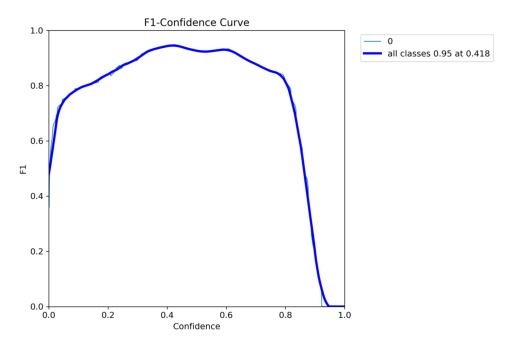

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/BoxF1_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Box PR curve:

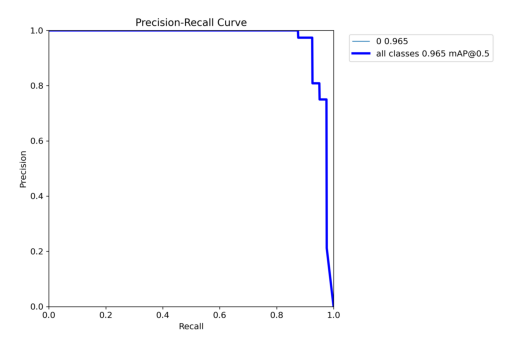

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/BoxPR_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Box P curve:

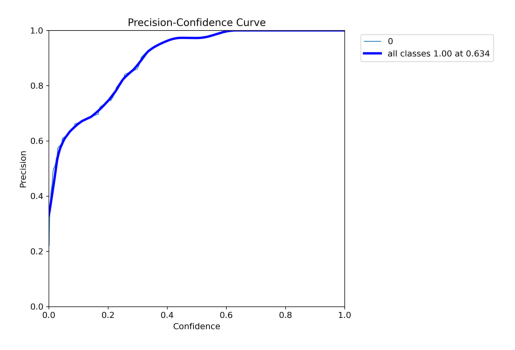

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/BoxP_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Box R Curve

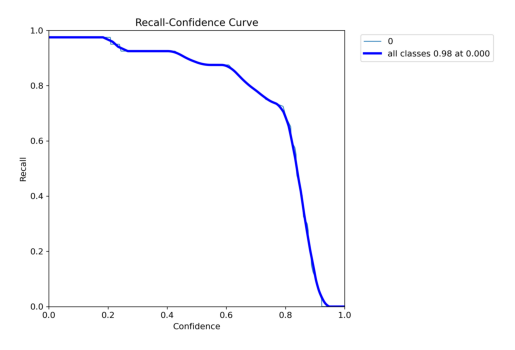

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/BoxR_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Mask F1 Curve:

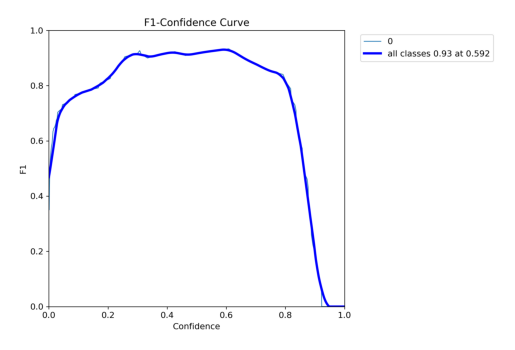

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/MaskF1_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Mask PR Curve:

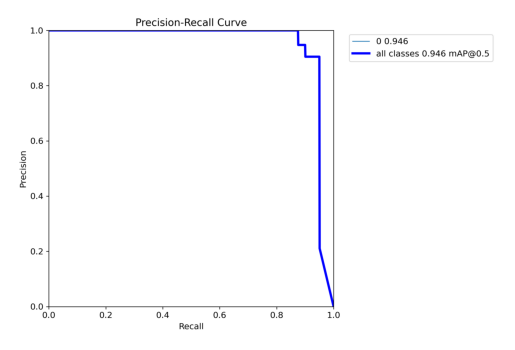

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/MaskPR_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Mask P Curve:

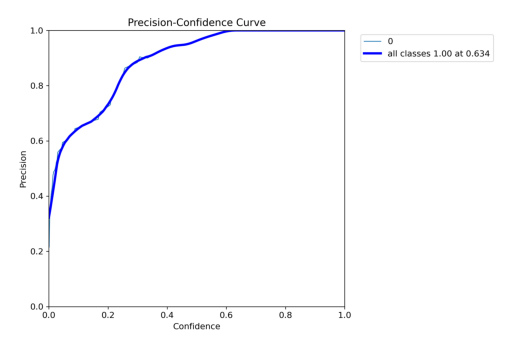

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/MaskP_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Mask R Curve:

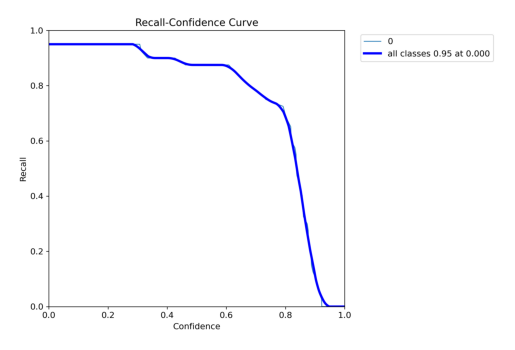

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/MaskR_curve.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


### Confusion Matrix (normalized):

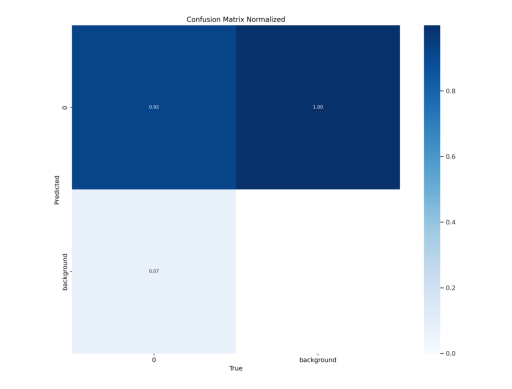

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image path
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/confusion_matrix_normalized.png'

# Read and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


# Part II: Mask Application and OCR implementation:

## Table of Contents



## 1. Mask Application:

### a. Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import cv2
import os
import torchvision.transforms as T
from IPython.display import display, Image as IPImage


### b. Run Inference and Generate Mask


0: 448x640 3 0s, 3339.4ms
Speed: 3.3ms preprocess, 3339.4ms inference, 12.2ms postprocess per image at shape (1, 3, 448, 640)


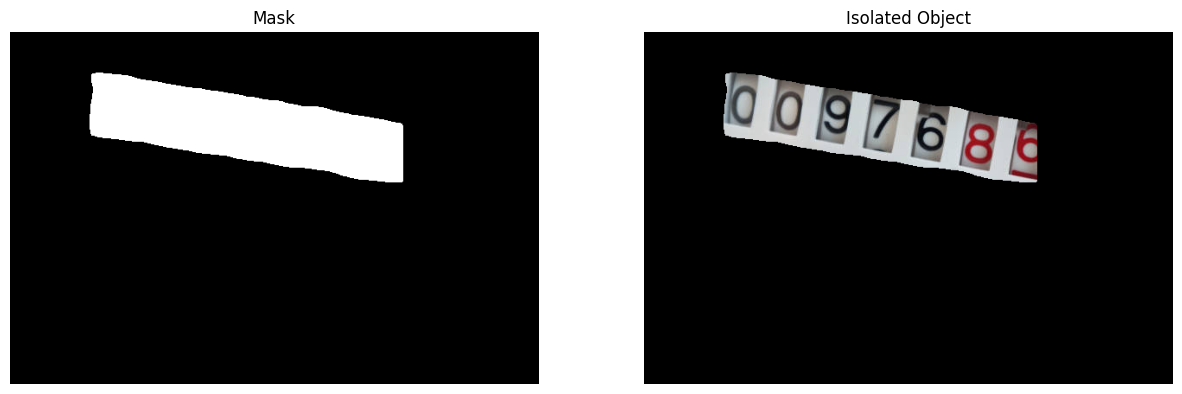

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
model_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/runs/segment/train2/weights/best.pt'
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/test.jpg'

# Load the image
img = cv2.imread(image_path)
H, W, _ = img.shape

# Initialize YOLO model
model = YOLO(model_path)

# Run inference
results = model(img)

# Create an empty mask with the same shape as the image
final_mask = np.zeros_like(img)

# Process results
for result in results:
    for j, mask in enumerate(result.masks.data):

        # Resize and threshold the mask
        mask = mask.numpy() * 255
        mask = cv2.resize(mask, (W, H))
        ret, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

        # Apply the mask to each channel of the original image
        for c in range(img.shape[2]):
            final_mask[:,:,c] = cv2.bitwise_and(img[:,:,c], img[:,:,c], mask=mask.astype(np.uint8))

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# Display the mask
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Mask')
ax[0].axis('off')

# Display the isolated object
ax[1].imshow(cv2.cvtColor(final_mask, cv2.COLOR_BGR2RGB))
ax[1].set_title('Isolated Object')
ax[1].axis('off')

# Show the plot
plt.show()


## 2. Image Pre-processing:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/output.png'

# Load the original image
img = cv2.imread(image_path)

### Convert to grayscale:

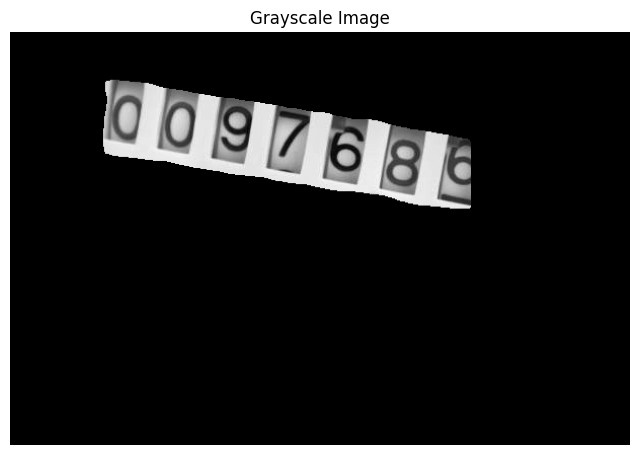

In [ ]:
# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

### Smoothing (Gaussian Blur)

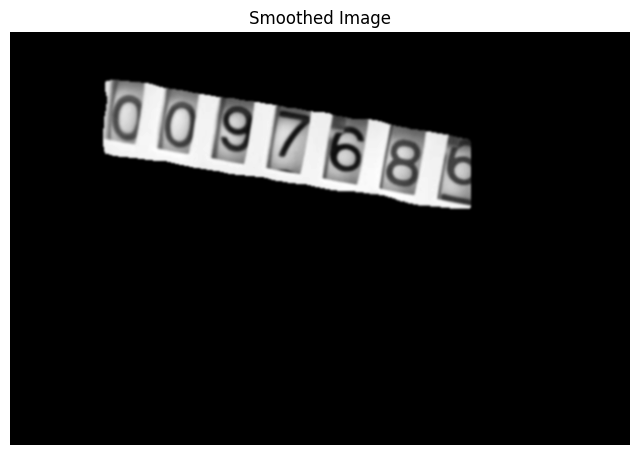

In [ ]:
# Apply smoothing (Gaussian Blur)
smooth_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Display smoothed image
plt.figure(figsize=(8, 8))
plt.imshow(smooth_img, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

### Denoising:

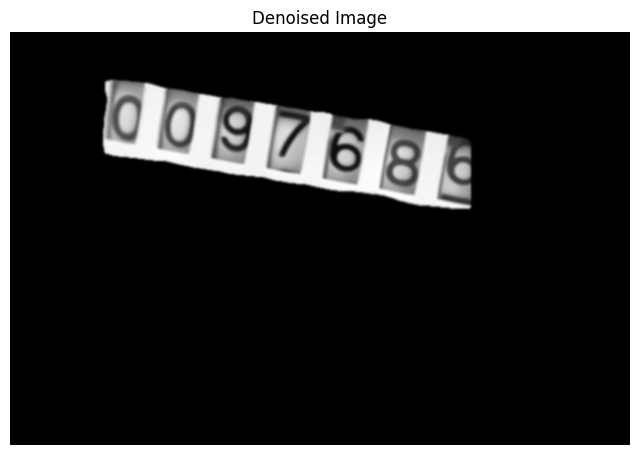

In [ ]:
# Apply denoising
denoised_img = cv2.fastNlMeansDenoising(smooth_img, None, 10, 7, 21)

# Display denoised image
plt.figure(figsize=(8, 8))
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

### Thresholding:

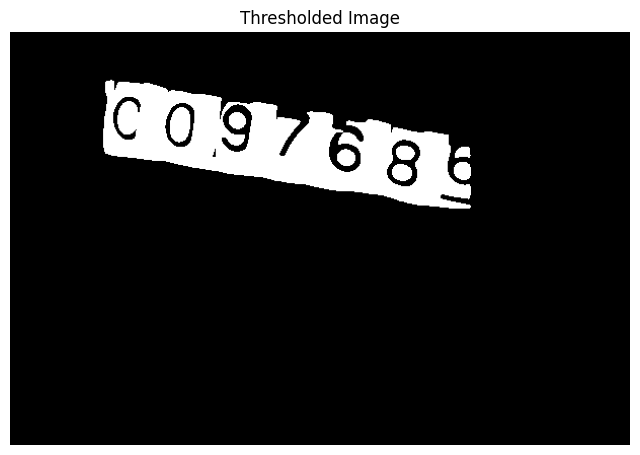

In [ ]:
# Apply thresholding
_, thresh_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display thresholded image
plt.figure(figsize=(8, 8))
plt.imshow(thresh_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

Processed image saved as /content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/processed_image.jpg


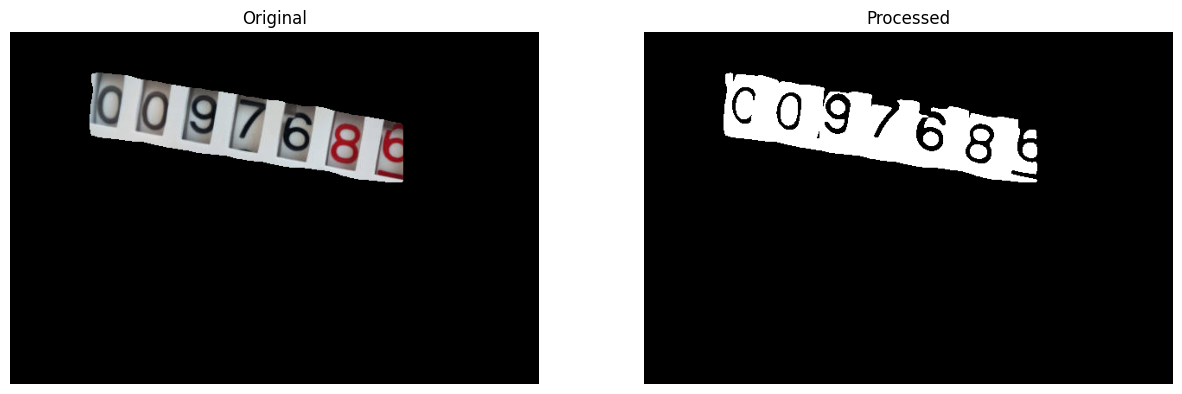

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/output.png'
processed_image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/processed_image.jpg'

# Load the original image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply smoothing (Gaussian Blur)
smooth_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply denoising
denoised_img = cv2.fastNlMeansDenoising(smooth_img, None, 10, 7, 21)

# Apply thresholding
_, thresh_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save the final processed image
cv2.imwrite(processed_image_path, thresh_img)

print(f"Processed image saved as {processed_image_path}")

# Display original and processed images side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# Display original image
ax[0].imshow(img_rgb)
ax[0].set_title('Original')
ax[0].axis('off')

# Display processed image
ax[1].imshow(thresh_img, cmap='gray')
ax[1].set_title('Processed')
ax[1].axis('off')

# Show the plot
plt.show()


## 3. OCR Application:

### a. Pytesseract

In [ ]:
# Install pytesseract and tesseract-ocr
!sudo apt install tesseract-ocr
!pip install pytesseract

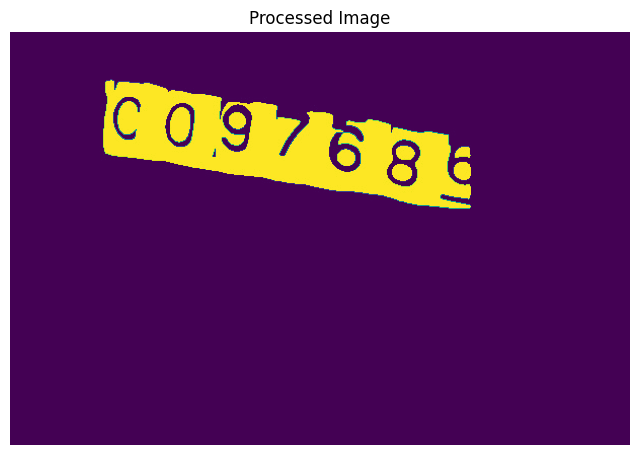


OCR Text:



In [ ]:
# Import necessary libraries
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the image
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/processed_image.jpg'

# Open the image using PIL
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.title('Processed Image')
plt.show()

# Use pytesseract to do OCR on the image
text = pytesseract.image_to_string(image)

# Print the extracted text
print("\nOCR Text:")
print(text)




```
# This is formatted as code
```

### b. EasyOCR:

In [ ]:
!pip install easyocr

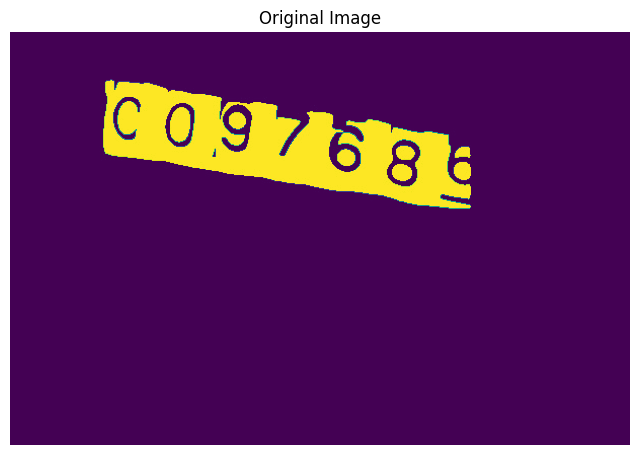


 Water Meter Reading:
C 0,9 7 6 8


In [ ]:
# Import necessary libraries
import easyocr
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the image
image_path = '/content/drive/MyDrive/PFE_2024/SecondMethod_Yolov8_Segmentation/processed_image.jpg'

# Open the image using PIL
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Change 'en' to the language you expect in the image

# Use EasyOCR to do OCR on the image
result = reader.readtext(image)

# Concatenate the recognized text into a single string
ocr_text = ' '.join([detection[1] for detection in result])

# Print the extracted text in a single line
print("\n Water Meter Reading:")
print(ocr_text)
